## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
numberofmice = len(merge_df['Mouse ID'])
print("There Are " + str(numberofmice) + " Mice")
numberofumice = merge_df['Mouse ID'].nunique()
print("There Are " + str(numberofumice) + " Unique Mice")

There Are 1893 Mice
There Are 249 Unique Mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# QUESTION FOR ERIN/WILL --> WHAT ARE THEY LOOKING FOR HERE??  

# the below returns all the duplicate Mouse ID's
duplicated_values = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
# duplicated_values = merge_df[merge_df.duplicated(subset=['Mouse ID'])]
duplicated_values

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merge_df.loc[merge_df['Mouse ID'] == 'g989']
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# First tried this way, but it did not drop ALL the g989 values.  It kept one so total count was 249.
# clean_df = merge_df.drop_duplicates(subset=['Mouse ID'])

# mouseid = merge_df['Mouse ID']
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']

clean_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1880

In [7]:
#If want to reset index

#new_index_df = clean_df.reset_index(drop=True)
#new_index_df.head()

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

groupbydrug = clean_df.groupby(clean_df["Drug Regimen"])

tumormean = round(groupbydrug["Tumor Volume (mm3)"].mean(), 6)
tumormedian = round(groupbydrug["Tumor Volume (mm3)"].median(), 6)
tumorvar = round(groupbydrug["Tumor Volume (mm3)"].var(), 6)
tumorstd = round(groupbydrug["Tumor Volume (mm3)"].std(), 6)
tumorsem = round(groupbydrug["Tumor Volume (mm3)"].sem(), 6)

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_dict = [{"Mean Tumor Volume": tumormean, "Median Tumor Volume": tumormedian}]
drug_stats = pd.DataFrame({'Mean Tumor Volume': tumormean,
                              'Median Tumor Volume': tumormedian,
                              'Tumor Volume Variance': tumorvar,
                              'Tumor Volume Std. Dev.': tumorstd,
                            'Tumor Volume Std. Err.': tumorsem
                          })

drug_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_stats2 = groupbydrug.agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem' ]})
drug_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
miceperdrug = groupbydrug["Mouse ID"].count()
miceperdrug = miceperdrug.sort_values(ascending=False)
drugregimen = miceperdrug.index.tolist()

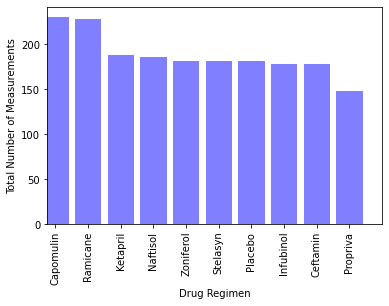

<Figure size 432x288 with 0 Axes>

In [12]:
x_axis = np.arange(len(miceperdrug))
# Create a bar chart based upon the above data
plt.bar(x_axis, miceperdrug, color="b", alpha=0.5, align="center")
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drugregimen, color='k', rotation="vertical")

# plt.title("Average Rain per State")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(rain_df["Inches"])+10)

plt.show()
plt.tight_layout()

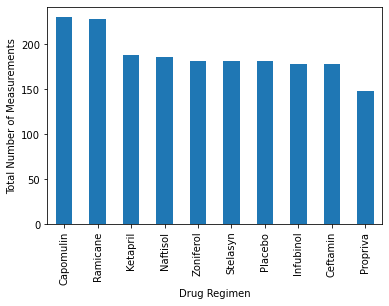

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
miceperdrug = groupbydrug["Mouse ID"].count()
miceperdrug = miceperdrug.sort_values(ascending=False)

# Create a bar chart based off of the group series from before
miceperdrug_chart = miceperdrug.plot(kind='bar')

# Set the xlabel and ylabel using class methods
miceperdrug_chart.set_xlabel("Drug Regimen")
miceperdrug_chart.set_ylabel("Total Number of Measurements")

plt.show()
plt.tight_layout()

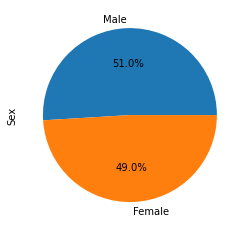

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_count = clean_df["Sex"].value_counts()
sex_count
colors=["blue", "orange"]

#Create the pie based upon the values above
sex_count.plot(kind="pie",autopct="%1.1f%%")

#plt.title("Title")
plt.ylabel("Sex")
plt.show()

([<matplotlib.patches.Wedge at 0x253a212df70>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Female'),
  Text(0.033082014082615095, -1.0995024239828841, 'Male')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

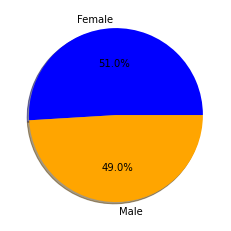

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female",'Male']

# The colors of each section of the pie chart
colors = ["blue", "orange"]

plt.pie(sex_count, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)

In [16]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [17]:
clean_df.groupby(["Mouse ID"]).max()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,45.000000,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxvalue = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
maxvalue = maxvalue.reset_index()

In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
    
merged = maxvalue.merge(clean_df,on=['Mouse ID','Timepoint'],how='left')
sortbydrug = merged.set_index('Drug Regimen')

In [31]:
sample_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumorresults = sortbydrug.loc[(sample_drugs)].reset_index()
tumorresults

,Drug Regimen,level_0,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,19,19,b128,45,38.982878,2,Female,9,22
1,Capomulin,24,24,b742,45,38.939633,0,Male,7,21
2,Capomulin,61,61,f966,20,30.485985,0,Male,16,17
3,Capomulin,64,64,g288,45,37.074024,1,Male,3,19
4,Capomulin,66,66,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...,...,...
95,Ceftamin,223,223,x226,0,45.000000,0,Male,23,28
96,Ceftamin,228,228,x581,45,64.634949,3,Female,19,28
97,Ceftamin,231,231,x822,45,61.386660,3,Male,3,29
98,Ceftamin,238,238,y769,45,68.594745,4,Female,6,27


In [32]:
# Put treatments into a list for for loop (and later for plot labels)

sample_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

# Loop through the list 
for drug in sample_drugs:
    tvolume = tumorresults.loc[tumorresults['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volumes[drug] = tvolume
    
# tumor_volumes

In [33]:
for key, value in tumor_volumes.items():
    
    quartiles = value.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    lower_outliers = [v for v in value.tolist() if v < lower_bound]
    upper_outliers = [v for v in value.tolist() if v > upper_bound]
    print(key, upper_outliers, lower_outliers)

Capomulin [] []
Ramicane [] []
Infubinol [] [36.321345799999996]
Ceftamin [] []


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# tumorresults = tumorresults.sort_values(by=['Drug Regimen'])
# tumorresults

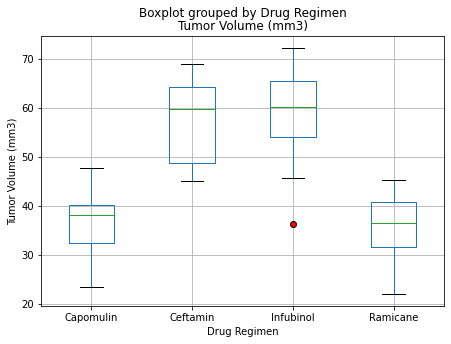

In [34]:
red_dot = dict(markerfacecolor='r', marker='o')
box_plot = tumorresults.boxplot(by="Drug Regimen",column =["Tumor Volume (mm3)"], flierprops=red_dot, figsize=(7,5))
box_plot.set_ylabel("Tumor Volume (mm3)");

plt.tight_layout
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
clean_df

In [ ]:
sortbymouse = clean_df.loc[clean_df['Mouse ID'],:]
sortbymouse

In [ ]:
sortbymouse = clean_df.set_index('Mouse ID') 
sortbymouse

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(sortbymouse)

In [ ]:
subjectmouse = sortbymouse.loc['l509']
subjectmouse

In [ ]:

# timevstumor = subjectmouse[["Timepoint", "Tumor Volume (mm3)"]]
# timevstumor
# # timevstumor.set_index("Timepoint")

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.plot(subjectmouse['Timepoint'], subjectmouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

# Show the chart
plt.tight_layout()
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# REFERENCE DAY 3
